transactions.csv 
Набор данных с самими транзакциями клиентов. Это самые актуальные данные, необходимые для решения задачи, приблизительно 350 тысяч транзакций. 
Как и все данные в этом соревновании, эти данные являются синтетическими, полученными путем модельной генерации последовательностей, модели для которых были обучены на основе реальных банковских датасетов. Дополнительная информация о процессе генерации доступна в разделе FAQ, а также будет изложена во время награждения в рамках Data Halloween.  
Структура данных: каждой транзакции соответствует строка в таблице, в которой содержится следующая информация: 

clnt_id — идентификатор клиента, по которому можно найти дополнительную информацию в других таблицах;
date — относительная дата, в которую была совершена транзакция;
mcc_id — идентификатор типа транзакции (Merchant Category Code). Предоставленные в рамках соревнования данные являются синтетическими, однако в реальных приложениях данный код определяет тип транзакции. 
Примеры кодов в реальных приложениях: “оплата в кафе и ресторанах”, “начисление зарплаты”, “снятие наличных в банкомате” и другие. Как правило, в банковских системах используются более 10 000 различных кодов, но в рамках предложенных данных мы сгенерировали только 50.
sum — сумма транзакции. Может быть как положительной (начисление на счет), так и отрицательной. Подробнее о структуре сумм внутри различных кодов транзакций можно узнать, начав анализировать данные :)

crm_data.csv
Данные, эмулирующие результат выгрузки из CRM (Customer relationship management) системы, представляют собой таблицу с перечнем самой разной информации о клиенте, доступной в моменте. Как и в реальных CRM-системах, различная информация может храниться в разных системах, иметь разную степень свежести, и иметь еще множество увлекательных для аналитиков свойств. 
Таблица содержит информацию о 2899 клиентах и содержит 20 столбцов с различной информацией о клиентах. Для участников самое важное в этих данных — поле clnt_id, соответствующее clnt_id в других таблицах, предоставленных в рамках соревнования. 
Самые важные поля в этой таблице следующие:

clnt_id — идентификатор клиентов банка;
is_premium — целевая переменная, которую нужно предсказать: 1- клиенты, имеющие премиальную карту; 0 - обычные клиенты. Целевая переменная доступна не для всех клиентов и именно в ее предсказании для новых клиентов и состоит задача соревнования. 
В процессе генерации предоставленного синтетического файла ни один реальный клиент не пострадал :) 

crm_goose.csv
По сценарию соревнования это те данные, которые остались в наследство от прежнего дата саентиста. Этот специалист уже ранее подступался к данной задаче, но не успел ни довести ее до пилотирования, ни передать по ней дела — столь сильно было желание сменить поле деятельности (мы его иногда прекрасно понимаем). К сожалению, этот специалист не только не слышал про воспроизводимость и REPA-ML, но нам даже не удалось отыскать код, воспроизводящий эти данные. Однако, сами данные уже содержат ряд признаков, которые могут помочь решить задачу. Помогут ли эти признаки участникам — узнаем на Data Halloween, когда мы раскроем backstage про подготовку задачи.

sample_subm
Это пример тестового файла, который вам нужно отправить продакт-менеджеру, пригласившему вас помочь с задачей предсказания премиальных клиентов. В банке стало больше новых клиентов и нужно предсказать, станут ли они пользователями премиальных карт или нет. Файл имеет следующую структуру:

clnt_id — идентификаторы новых клиентов банка, для которых нужно предсказать, станут ли они премиальными клиентами;
is_premium — бинарная метка вашего предсказания: 1 - станут премиальными клиентами; 0 - не станут. Обратите внимание: продакт-менеджера не интересуют ни вероятности, ни расстояния до разделяющих гиперплоскостей. Нужны просто четкие предсказания: станет или нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crm_data=pd.read_csv('crm_data.csv')
crm_data

,clnt_id,clnt_gender,clnt_age,clnt_device,clnt_device_get,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
0,2001,1.0,32,sO@*%lun08,vgIXi0LgoZHQ71Mmekm1,0.0,0.0,1,180000,2,6,3,1,1428,320,76,7227.0,1.0
1,2006,1.0,20,)!%OA9qpZP,lmE6l7DelsqZNYgxcsAZ,1.0,0.0,0,250000,5,11,4,1,1428,1000,66,7227.0,1.0
2,2012,0.0,24,IgSHlRCsd#,yhUtC1GSVpWWNPCI9EYo,NaN,0.0,0,310000,4,8,4,1,1428,1750,18,7233.0,1.0
3,2013,0.0,42,SSbZb5Hpun,TM4ptl78Lwzhng7PAY4G,1.0,0.0,1,110000,8,9,6,1,1428,1180,30,7227.0,1.0
4,2014,0.0,25,N)Eb*EJXD4,lmE6l7DelsqZNYgxcsAZ,1.0,0.0,1,300000,8,10,4,1,1428,1000,24,7227.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,4984,1.0,24,!Zusbz4GJ@,DUPFnmZiv2kqwJJgYK0p,0.0,0.0,1,370000,5,28,0,1,1427,100,0,NaN,NaN
2895,4986,0.0,22,YBjx-RAB9!,4CdUr2g9UqwFuqdVaWdO,0.0,1.0,0,0,2,30,6,1,1428,1000,0,NaN,NaN
2896,4987,0.0,24,nR4%tYIRXv,qhf9RhOTHsX15m3UzA94,1.0,0.0,0,21000000,4,31,27,1,1428,1000,0,NaN,NaN
2897,4991,0.0,24,^+3(I8C%&b,NaN,1.0,0.0,3,380000,5,26,25,1,1428,510,0,NaN,NaN


In [3]:
crm_goose=pd.read_csv('crm_goose.csv')
crm_goose

,clnt_id,grey_goose_F0,grey_goose_F1,grey_goose_F2,grey_goose_F3,grey_goose_F4,goose_agg_0,goose_agg_1,goose_agg_2,goose_agg_3,...,wild_goose_A_0,wild_goose_A_1,wild_goose_A_2,wild_goose_A_3,wild_goose_A_4,wild_goose_A_5,wild_goose_A_6,wild_goose_A_7,wild_goose_A_8,wild_goose_A_9
0,3700,0,1,1,1,0,98.0,-87449.0,2138.696906,113.0,...,5743.754372,2362.996967,-6000.0,NaN,NaN,NaN,NaN,NaN,12831.625239,5.0
1,4545,0,0,1,1,0,94.0,-542660.0,25775.051604,107.0,...,NaN,14289.920941,-22000.0,NaN,100000.0,NaN,NaN,NaN,NaN,6.0
2,3656,0,1,0,0,1,NaN,NaN,NaN,NaN,...,NaN,1530.359435,-3800.0,-10500.0,20000.0,NaN,NaN,NaN,9347.738140,6.0
3,4445,1,1,1,1,0,46.0,-122665.0,9808.466833,54.0,...,871.779789,3386.310076,-10000.0,NaN,NaN,NaN,NaN,NaN,935.269034,6.0
4,4112,0,1,1,0,0,NaN,NaN,NaN,NaN,...,NaN,3755.440498,-8000.0,-1111.0,720.0,1.0,-39.0,NaN,934.470566,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,4320,1,1,1,1,0,9.0,-44179.0,4146.928254,10.0,...,NaN,0.000000,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2910,4242,0,0,0,0,0,23.0,-72742.0,3087.292634,26.0,...,NaN,3948.468198,-13000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2911,4676,0,0,0,0,1,18.0,-51821.0,4353.479389,20.0,...,NaN,1649.724583,-4000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2912,4556,0,1,1,1,0,52.0,-50623.0,1448.669609,60.0,...,NaN,1419.481908,-8000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
transactions=pd.read_csv('transactions.csv')
transactions

,clnt_id,date,mcc_id,sum
0,2013,1211,44,1000.0
1,2019,1211,5,-176.0
2,2019,1211,5,-105.0
3,2019,1211,33,-2000.0
4,2019,1211,33,-230.0
...,...,...,...,...
350412,4987,1449,43,-5000.0
350413,4988,1449,5,-409.0
350414,4989,1449,5,-299.0
350415,4994,1449,12,-1200.0


Рассмотрим crm_data

In [5]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clnt_id          2899 non-null   int64  
 1   clnt_gender      2786 non-null   float64
 2   clnt_age         2899 non-null   int64  
 3   clnt_device      2801 non-null   object 
 4   clnt_device_get  2801 non-null   object 
 5   has_car          2692 non-null   float64
 6   has_estate       2711 non-null   float64
 7   clnt_children    2899 non-null   int64  
 8   clnt_income      2899 non-null   int64  
 9   clnt_pick        2899 non-null   int64  
 10  clnt_fortune     2899 non-null   int64  
 11  clnt_status      2899 non-null   int64  
 12  clnt_system      2899 non-null   int64  
 13  spend_last       2899 non-null   int64  
 14  spend_level      2899 non-null   int64  
 15  spend_points     2899 non-null   int64  
 16  manager_contact  755 non-null    float64
 17  is_premium    

In [6]:
crm_data.describe()

,clnt_id,clnt_gender,clnt_age,has_car,has_estate,clnt_children,clnt_income,clnt_pick,clnt_fortune,clnt_status,clnt_system,spend_last,spend_level,spend_points,manager_contact,is_premium
count,2899.000000,2786.000000,2899.000000,2692.000000,2711.000000,2899.000000,2.899000e+03,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.00000,755.000000,1538.000000
mean,3501.526388,0.502513,104.801311,0.503715,0.148654,0.332873,8.736288e+05,4.456019,19.514660,9.270093,1.223870,1427.168679,839.284926,24.61573,7215.978808,0.469441
std,865.813819,0.500083,376.473500,0.500079,0.355812,0.579074,4.225547e+06,2.879040,5.048834,6.429195,0.469096,6.500000,2716.802823,65.01844,33.099153,0.499228
min,2000.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000,0.000000,1.000000,1295.000000,0.000000,0.00000,7122.000000,0.000000
25%,2748.500000,0.000000,23.000000,0.000000,0.000000,0.000000,1.000000e+05,2.000000,16.000000,4.000000,1.000000,1428.000000,200.000000,0.00000,7227.000000,0.000000
50%,3502.000000,1.000000,26.000000,1.000000,0.000000,0.000000,2.000000e+05,4.000000,20.000000,9.000000,1.000000,1428.000000,427.000000,0.00000,7227.000000,0.000000
75%,4249.500000,1.000000,31.000000,1.000000,0.000000,1.000000,3.000000e+05,7.000000,23.000000,15.000000,1.000000,1428.000000,980.000000,0.00000,7227.000000,1.000000
max,4999.000000,1.000000,2001.000000,1.000000,1.000000,4.000000,3.900000e+07,9.000000,34.000000,31.000000,3.000000,1428.000000,120000.000000,594.00000,7248.000000,1.000000


Есть выбросы по возрасту, 2001 явно кто-то перепутал дату рождения и возраст, плюс среднее превышает в 3 раза 75% квартиль. У 75+ нету недвижимости. Среднее по доходу превышает 75% квартиль. Spend last очень странные значения, spend_level надо изучить вместе со spend_points и manager_contact.

<AxesSubplot:>

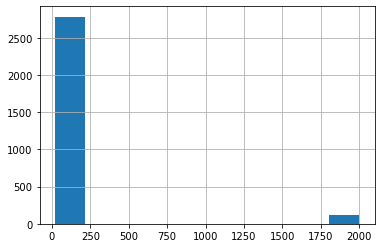

In [7]:
crm_data.clnt_age.hist()

<AxesSubplot:>

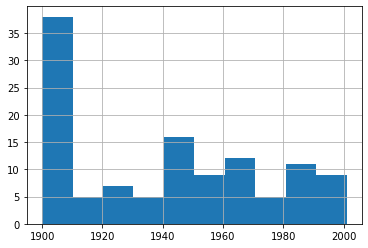

In [8]:
crm_data.loc[crm_data['clnt_age']>1700].clnt_age.hist()

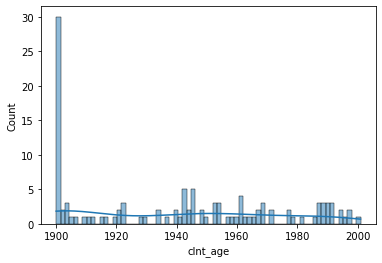

In [9]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1700].clnt_age, kde=True,bins=70)
plt.show()

In [10]:
len(crm_data.loc[crm_data['clnt_age']==1900])

30

1900 заменили как нет данных, надо будет заменить их. С остальными пока не знаю что делать.

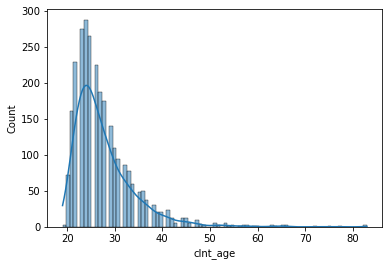

In [11]:
sns.histplot(crm_data.loc[crm_data['clnt_age']<250].clnt_age, kde=True,bins=85)
plt.show()

In [12]:
max(crm_data.loc[crm_data['clnt_age']<250].clnt_age)

83

In [13]:
min(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

1902

Если у кого-то стоит год 1902, то ему уже 118 лет, что вряд ли вероятно, ведь максимум по обычным годам равен лишь 83, плюс скорее всего это будет сильно влиять на алгоритм, поэтому стоит их поставить в Null

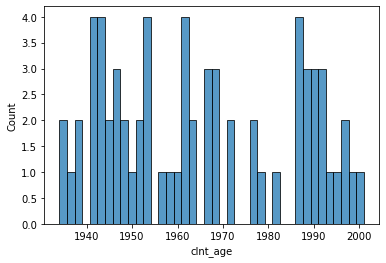

In [14]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1930].clnt_age,bins=40)
plt.show()

In [15]:
len(crm_data.loc[crm_data['clnt_age']>1930].clnt_age)

67

In [16]:
len(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

87

20 значений с высокой вероятностью ошибки, лучше их будет тоже заменить на Null

In [17]:
crm_data.loc[(crm_data['clnt_age']>=1900) & (crm_data['clnt_age']<1940),'clnt_age']=np.nan

In [18]:
crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']=2020-crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']

<AxesSubplot:xlabel='clnt_age', ylabel='Count'>

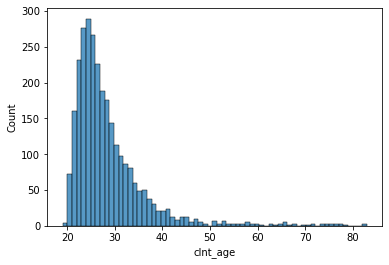

In [19]:
sns.histplot(crm_data.clnt_age)

<AxesSubplot:xlabel='clnt_age', ylabel='Count'>

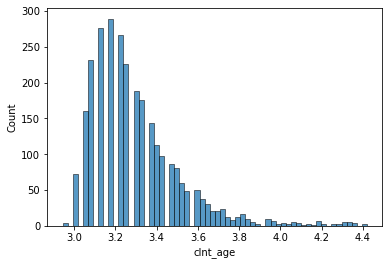

In [25]:
sns.histplot(np.log(crm_data.clnt_age),bins=60)

Распределение похоже на нормальное, но с длинным хвостом справа, поэтому лучше будет прологарифмировать и сохранить как столбец.

In [26]:
crm_data['log_age']=np.log(crm_data.clnt_age)

<AxesSubplot:>

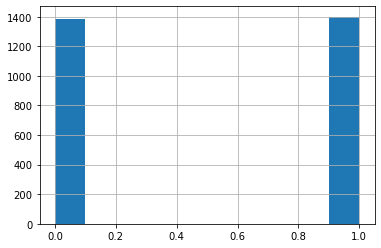

In [29]:
crm_data.clnt_gender.hist()

In [30]:
crm_data.clnt_device.unique()

array(['sO@*%lun08', ')!%OA9qpZP', 'IgSHlRCsd#', 'SSbZb5Hpun',
       'N)Eb*EJXD4', '_)nLk%PngJ', 'vJ#XVpcNy6', 'pi&NYvrpiu',
       'NMZa(_ZevK', 'tZet+bbIC_', 'T+BA%psI8c', 'ghOfqAzHdO',
       '+qOE#oK7Bu', 'm1o4W&JCvy', nan, 'Y1+5*e_(9D', 'rcJgTotoi8',
       'KnasAzg4Vf', 'tyOjI2@FcB', 'A&D5V21q5$', '$pffcP&pkj',
       '^+3(I8C%&b', 'Nljw_d_PZV', 'rreI!9jkPq', 'WUn^8@yRRZ',
       'm4Onx$jC_+', '+d)U@Ozdq@', 'R6B&KN5OOi', 'K*)FJ)edcZ',
       '&qrVc7H^jE', '4(*Kax8&YS', '@bM12Da%6&', 'cN50%TMttL',
       '4!5PbGR!VN', 'W@&0muZANj', '6J4&mF&#tl', 'UaSer)d$CZ',
       'y3FVI6dzfi', 'gTkSzDk+OA', 'yJrFzC0McE', 'nR4%tYIRXv',
       'AWrJqks-tw', '!Zusbz4GJ@', 'sUse$3S4Z%', '4aQwCtPL4(',
       'H#s_lw9F_R', 'exk&etBeLF', 'Bg01S^%Jfy', 'jso!fQ*Q7x',
       'py_Z4O$Gg+', '_cbxM0a-Yi', '-(Tu#R_@lh', 'zzhjn9-Ew-',
       'xAZj4fx97F', 'vB5-)b$ZR+', '_)nAgN9)Gz', 'fXm+BayjVA',
       'YBjx-RAB9!', '&UiIgr6b05', 'C_QpEX%9CB', '(O@$+)2-Iq'],
      dtype=object)

С учетом их примерно одинакового непонятного сложения, лучше будет просто перевести с помощью labelencoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
crm_data['le_device']=le.fit_transform(crm_data.clnt_device)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

Окей, значит надо перевести все в str

In [38]:
crm_data['le_device']=le.fit_transform(crm_data.clnt_device.astype(str))

<AxesSubplot:>

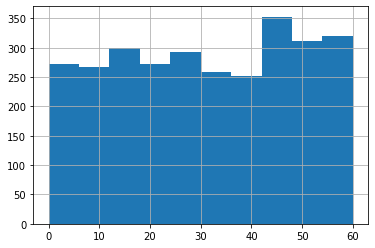

In [40]:
crm_data.le_device.hist()

Распределено примерно равномерно

In [41]:
crm_data.clnt_device_get.unique()

array(['vgIXi0LgoZHQ71Mmekm1', 'lmE6l7DelsqZNYgxcsAZ',
       'yhUtC1GSVpWWNPCI9EYo', 'TM4ptl78Lwzhng7PAY4G',
       'EAE3RcxIwQfn3oIbcXZN', 'RD8BUJjq4e1qknku300N',
       'yHrDLKQ3V9TnmM5OZdNu', 'Xlh4OkBJvFkCElKYmKNQ',
       'liZPCZF6tFgGEt1bTPHs', 'noI8N7cvgfYPRswJVqSt',
       '4tn4ahgRkWMzsSCk5tnp', 'zY5grwt3TK2vXDNOXNtQ',
       'xwVatkCS227il3xATBFE', 'Jw5OmlNzw1TWSySS8Kz6',
       'Wlb9y8b5EujLakHZQZ0D', 'SYy2B7hNPyV792L5eCqu',
       'RKcjWOC0kWGyGsDi325Q', 'duj1wNy6PQygCaQYt6ze',
       'apqNDBwDXCytWs6F1c29', 'a25dNMsZKjRHnhp7WJkD',
       'zPz024CQIonY5H9jYIve', 'vtFJx028ksA5j1r4Gevb',
       '6153L0t8XPPwrqlaHrPc', 'U5K7lQEiD5wBoxQfY6Tz',
       'qhf9RhOTHsX15m3UzA94', 'JZ0KLFgkXP3A9WMANoni',
       'nrQMSSqhv27ILkeKQI8X', 'NJRRltMExbMcFROsvdGD',
       'ZRg0ZwLzu2FL5jted9eX', 'AEvBGGIi1TYMZpsS5CoK',
       'DAHGwLtn4JPcATVSWFHk', 'u6H8Em4pxxagN7S8TAR5',
       'DLtGblMWq46ducD1uhFp', 'C6o0rm2Kne9WJe6IrQhX',
       'jEt2cvpo9kv8BjV7S6ay', 'Jsdxxb8QCqG5031DdLI5',
       'hp

In [42]:
crm_data['le_device_get']=le.fit_transform(crm_data.clnt_device_get.astype(str))

<AxesSubplot:>

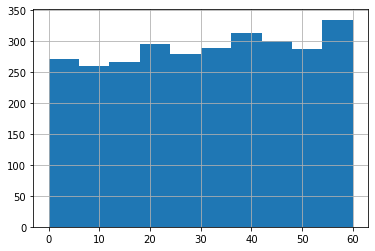

In [43]:
crm_data.le_device_get.hist()

То же самое

<AxesSubplot:>

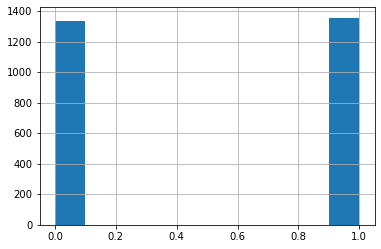

In [44]:
crm_data.has_car.hist()

has_estate       2711 non-null   float64

 7   clnt_children    2899 non-null   int64  
 
 8   clnt_income      2899 non-null   int64  
 
 9   clnt_pick        2899 non-null   int64  
 
 10  clnt_fortune     2899 non-null   int64  
 
 11  clnt_status      2899 non-null   int64  
 
 12  clnt_system      2899 non-null   int64  
 
 13  spend_last       2899 non-null   int64  
 
 14  spend_level      2899 non-null   int64  
 
 15  spend_points     2899 non-null   int64  
 
 16  manager_contact  755 non-null    float64
 
 17  is_premium       1538 non-null   float64

<AxesSubplot:>

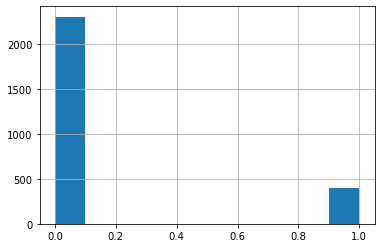

In [45]:
crm_data.has_estate.hist()

Вот тут резкий перекос

<AxesSubplot:>

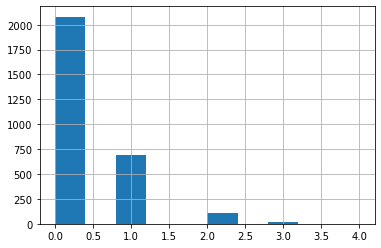

In [46]:
crm_data.clnt_children.hist()

Логарифмическое распределение получается. Окей.

Интересная странность в том, что владение недвижимостью указали не все, в то же время про детей рассказали все, пока не знаю зачем, но интересно.

<AxesSubplot:>

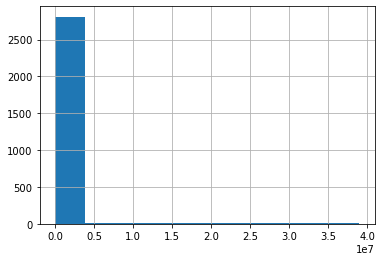

In [47]:
crm_data.clnt_income.hist()

Можно ли опираться на этот столбец? Если данных очень мало.

<AxesSubplot:>

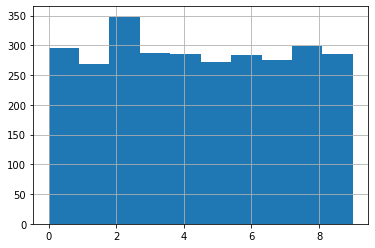

In [48]:
crm_data.clnt_pick.hist()

<AxesSubplot:>

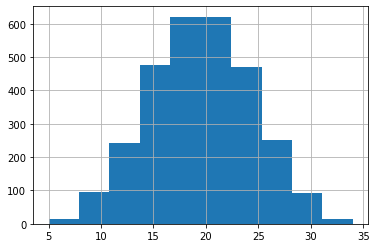

In [49]:
crm_data.clnt_fortune.hist()

Слишком красиво, слишком ровно, слишком странно.